<a href="https://colab.research.google.com/github/Tieck-IT/Study/blob/main/template/%5Btemplate%5DROCAUC_and_confusionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN

In [11]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.metrics import *

import time

In [12]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255
test_x = raw_test_x/255

# Conv2D는 width*height*channel을 입력으로 받음
train_x = train_x.reshape((60000, 28, 28, 1)) # ADDED
test_x = test_x.reshape((10000, 28, 28, 1)) # ADDED

train_y = raw_train_y
test_y = raw_test_y

In [13]:

model = keras.Sequential()
# model.add(Input((28,28)))
model.add(Input((28,28,1)))
model.add(Conv2D(32, (3, 3))) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED
model.add(Conv2D(64, (3, 3))) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


hist = model.fit(train_x, train_y, epochs=5, verbose=1, validation_split=0.1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 10)               

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


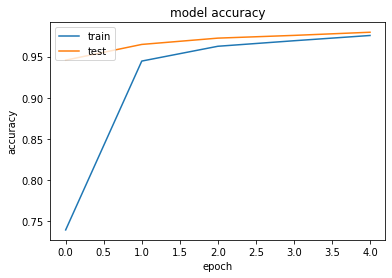

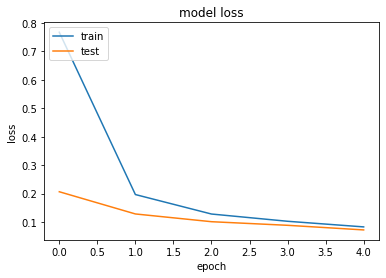

In [14]:
print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


n_classes = 10

In [16]:
fpr = dict()
tpr = dict()
roc_auc = dict()


test_y_encoded = np.eye(n_classes)[test_y]
predicted_encoded = np.eye(n_classes)[predicted]


for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(test_y_encoded[:, i], predicted_encoded[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(test_y_encoded.ravel(), predicted_encoded.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

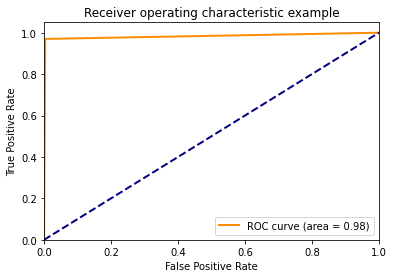

In [17]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(test_y, predicted)
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)

[[ 967    1    1    0    0    1    5    1    3    1]
 [   0 1127    4    0    0    3    0    1    0    0]
 [   2    6 1001    1    0    3    2   13    4    0]
 [   0    0    8  979    0   12    0    6    2    3]
 [   0    1    0    0  963    0    1    1    6   10]
 [   1    2    0    2    1  878    2    0    0    6]
 [   7    4    0    0    5    3  935    0    4    0]
 [   1    5   11    2    0    1    0 1004    3    1]
 [   6    1    6    1    9    2    0    6  938    5]
 [   2    7    0    0    8    3    0    7    1  981]]


In [19]:
print(classification_report(test_y, predicted, target_names=['0','1','2','3','4','5','6','7','8','9']))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.99      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



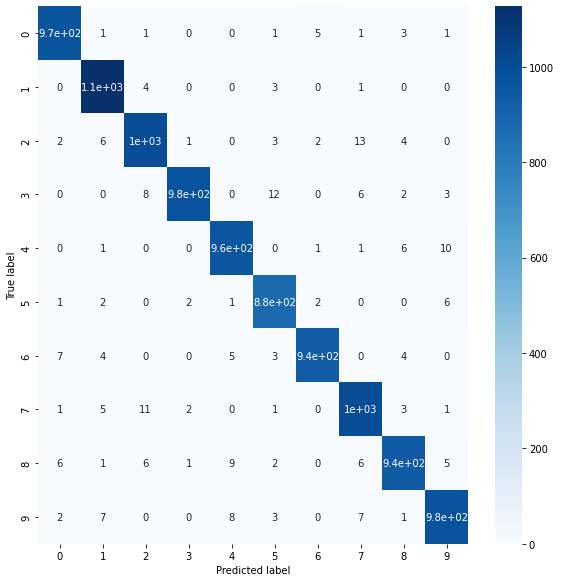

In [20]:
import seaborn as sns

figure = plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# AUCROC 그리기

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


n_classes = 10

In [28]:
test_y = test_y.astype(int)
predicted = predicted.astype(int)
fpr = dict()
tpr = dict()
roc_auc = dict()


test_y_encoded = np.eye(n_classes)[test_y]
predicted_encoded = np.eye(n_classes)[predicted]


for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(test_y_encoded[:, i], predicted_encoded[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(test_y_encoded.ravel(), predicted_encoded.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

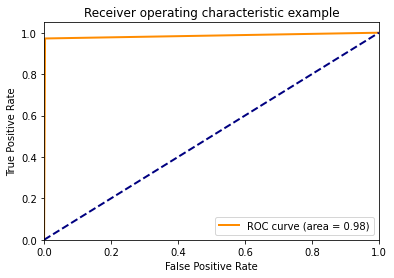

In [29]:
plt.figure()
lw = 2
plt.plot(fpr[n_classes-1], tpr[n_classes-1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[n_classes-1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix & Metrics

In [30]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix

In [42]:
print("Accuracy : ", accuracy_score(test_y,predicted))
print("Recall : ", recall_score(test_y,predicted,average =None)) # 클래스별 recall
print("Recall : ", recall_score(test_y,predicted,average ="weighted")) # 각 라벨 비중별 가중 평균
print("Recall : ", f1_score(test_y,predicted,average =None)) # 클래스별 recall
print("Recall : ", f1_score(test_y,predicted,average ="weighted")) # 각 라벨 비중별 가중 평균

Accuracy :  0.9773
Recall :  [0.98673469 0.99295154 0.96996124 0.96930693 0.98065173 0.98430493
 0.97599165 0.9766537  0.96303901 0.97224975]
Recall :  0.9773
Recall :  [0.9837233  0.98470948 0.97043141 0.98145363 0.97865854 0.97664071
 0.98265896 0.97145622 0.96950904 0.97321429]
Recall :  0.9772972971241773


0.9773